# Case study on Supervised learning

Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read the dataset to the python environment.

In [2]:
# Loading the excel file into a pandas dataframe.
iris_data = pd.read_excel('iris.xls')

In [3]:
# Display the data
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# number of elements in each dimension (Rows and Columns)
iris_data.shape

(150, 5)

In [5]:
# Summary of the data
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Display the columns in the dataset
iris_data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

From the iris dataset :

- 50 samples of 3 different species of iris (150 samples total)
- Measurements: sepal length, sepal width, petal length, petal width


In [7]:
# check the target variable
iris_data['Classification'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Classification, dtype: int64

As you can see that the feature 'Classification' is the target variable in the iris dataset (whether the iris classifcation there are 50 observations of each species (setosa, versicolor, virginica). Hence it is a Multi-Class Classification Problem

### 2. Do necessary pre-processing steps.

In [8]:
# check the data type for all features in the dataset
iris_data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

Now, we need to check whether any null or missing values present in the iris dataset

In [9]:
# Calculating the null values present in each columns in the dataset (Before treatment)
iris_data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

As you can see that there are 19 null or missing values present in the iris dataset. The features sepal length(SL), sepal width(SW) and petal length(PL) are having the null values. we can treat the null values. Since sepal length(SL), sepal width(SW) and petal length(PL) are float data type so we can fill the missing values with mean/median method.

In [10]:
# Display the data before missing values treatment
iris_data[iris_data.isna().any(axis=1)] # check at least one null values in a row 

,SL,SW,PL,PW,Classification
2,NaN,3.2,1.3,0.2,Iris-setosa
10,5.4,NaN,1.5,0.2,Iris-setosa
21,NaN,3.7,1.5,0.4,Iris-setosa
27,5.2,NaN,1.5,0.2,Iris-setosa
28,5.2,3.4,NaN,0.2,Iris-setosa
39,NaN,3.4,1.5,0.2,Iris-setosa
42,4.4,3.2,NaN,0.2,Iris-setosa
43,5.0,NaN,1.6,0.6,Iris-setosa
51,NaN,3.2,4.5,1.5,Iris-versicolor
56,6.3,3.3,NaN,1.6,Iris-versicolor


We can use plots and summary statistics to help identify missing or corrupt data.

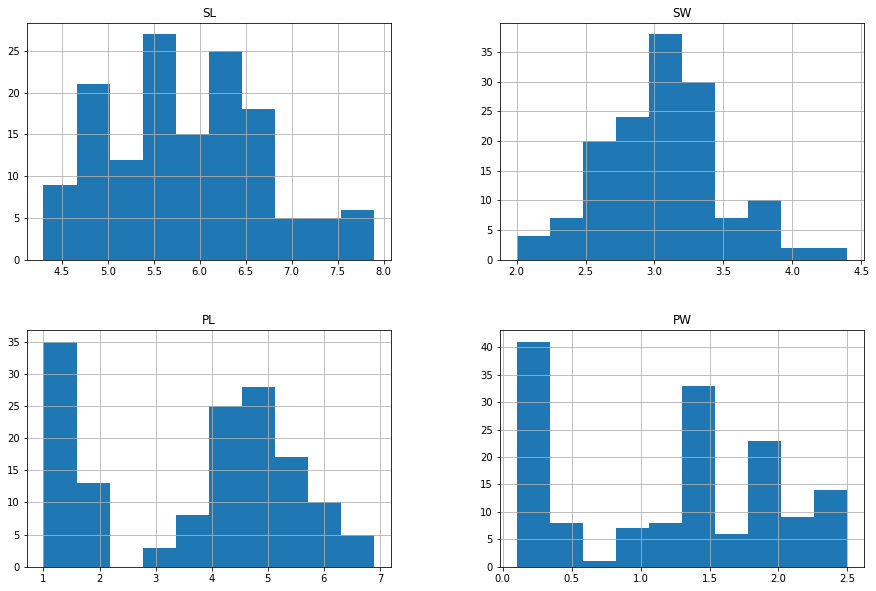

In [11]:
# we can plot the frequency graph
freq_graph = iris_data.select_dtypes(include=['float64'])
freq_graph.hist(figsize=(15,10))
plt.show()

From the above frequency graph we can say that sepal length(SL), sepal width(SW) , petal length(PL) and Petal Width(PW) are follows almost normal distribution so we can use mean for missing values treatment.

In [12]:
# The Statistical summary of iris dataset
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SL,143.0,5.855944,0.828168,4.3,5.1,5.80,6.4,7.9
SW,144.0,3.049306,0.430644,2.0,2.8,3.00,3.3,4.4
PL,144.0,3.756250,1.761306,1.0,1.6,4.35,5.1,6.9
PW,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


> "Missing values are frequently indicated by out-of-range entries; perhaps a negative number (e.g., -1) in a numeric field that is normally only positive, or a 0 in a numeric field that can never normally be 0".

Here we can see the complete statistical summary of count, mean, statndard deviation, minimum value of each column also maximum, 25%, 50% and 75% percentile.

we can use a loop to treat missing or null values for sepal length(SL), sepal width(SW) and petal length(PL)

In [13]:
# fill the missing values
missing_val = ['SL','SW','PL']

for i in missing_val:
    iris_data[i] = iris_data[i].fillna(iris_data[i].mean())

In [14]:
# Calculating the null values present in each columns in the dataset (After treatment)
iris_data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [15]:
# Display the data after missing values treatment
iris_data[iris_data.isna().any(axis=1)] # check at least one null values in a row 

,SL,SW,PL,PW,Classification


As you can see that it is treated well for missing values in sepal length(SL), sepal width(SW) and petal length(PL). Now our iris dataset is completely treated with no null or missing values

In [16]:
# number of elements in each dimension (Rows and Columns)
iris_data.shape

(150, 5)

So next we can check and handle outliers in the iris dataset. For finding outliers we can use boxplot.

In [17]:
# Display the columns in the dataset
iris_data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

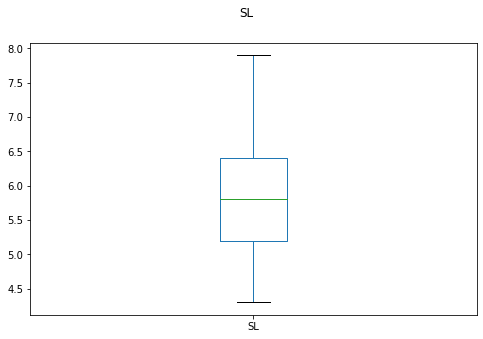

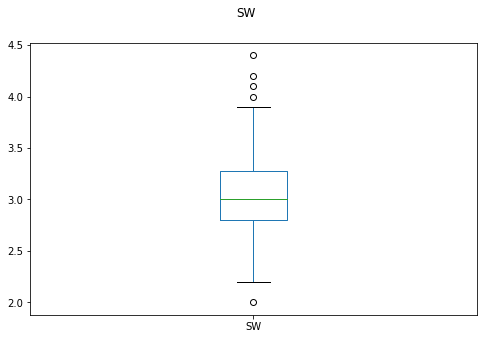

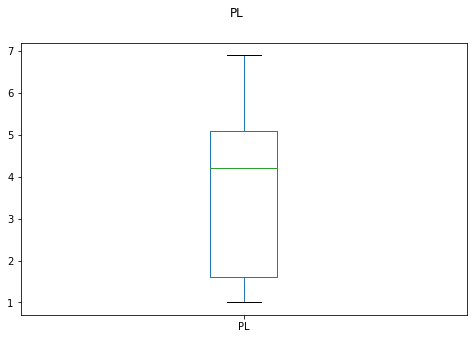

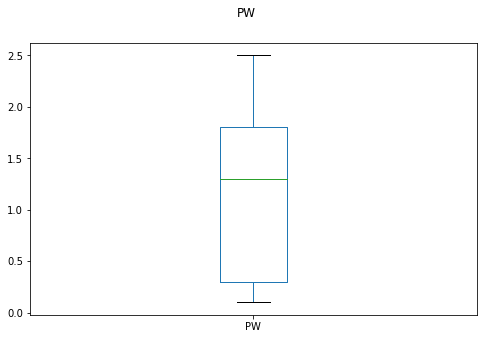

In [18]:
# boxplot before removing the outliers from SL, SW, PL and PW features
for i in iris_data.columns[iris_data.dtypes == float]:
   fig = plt.figure(figsize=(8,5))
   iris_data[i].plot(kind='box')
   fig.suptitle(i)

As you can see that there are some outliers present in the Sepal Width(SW) features so we need to remove the outliers.

> Sepal Width (SW) feature

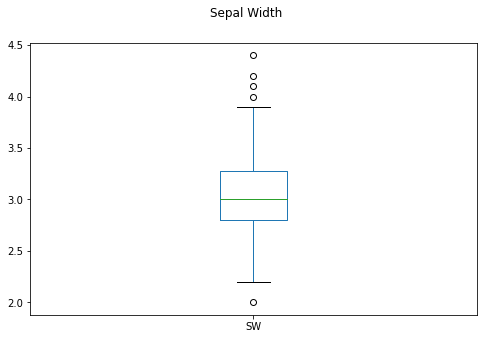

In [19]:
# boxplot before removing the outliers from Sepal Width feature
fig = plt.figure(figsize=(8,5))
iris_data['SW'].plot(kind='box')
fig.suptitle('Sepal Width')
plt.show()

In [20]:
# For removing outliers first we need to check the quartiles. It manages the outliers.
Q1 = np.percentile(iris_data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(iris_data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(iris_data['SW'],75,interpolation='midpoint')
print('Q1: ',Q1,'\nQ2: ',Q2,'\nQ3: ',Q3)

# check the inter quartile range (IQR)
IQR = Q3 - Q1
print('IQR: ',round(IQR,2))

#check the lower and upper limit 
low_lm = Q1-1.5*IQR
upp_lm = Q3+1.5*IQR
print("Lower limit is : ",round(low_lm,2))
print("Upper limit is : ",round(upp_lm,2))

'''Normally the datapoints which fall below Q1-1.5(IQR) and above Q3+1.5(IQR) are considered as outliers.
 If the value above the upper limit or below the lower limit we need to remove that outliers.'''

 # display the outilers
outliers = []
for i in iris_data['SW']:
  if((i>upp_lm)or(i<low_lm)):
    outliers.append(i)

print("Outliers in the Sepal Width: ",outliers)

Q1:  2.8 
Q2:  3.0 
Q3:  3.25
IQR:  0.45
Lower limit is :  2.12
Upper limit is :  3.92
Outliers in the Sepal Width:  [4.0, 4.4, 4.1, 4.2, 2.0]


As you can see that these values are the outliers in the Sepal Width feature and also we can observe that there is one lower limit value and remaining all the upper limit values as outliers. Now we need to find the index values for the outliers. 

In [21]:
# select the index of these outliers
indx_low = iris_data['SW']<low_lm
outlier_indx_low = iris_data.loc[indx_low].index

indx_upp = iris_data['SW']>upp_lm
outlier_indx_upp= iris_data.loc[indx_upp].index

print('The outliers index value of lower limit is {}'.format(outlier_indx_low),
      '\nand upper limit is {}'.format(outlier_indx_upp))

The outliers index value of lower limit is Int64Index([60], dtype='int64') 
and upper limit is Int64Index([14, 15, 32, 33], dtype='int64')


In [22]:
# drop these index for removing outliers
iris_data.drop(outlier_indx_low, inplace=True)
iris_data.drop(outlier_indx_upp, inplace=True)

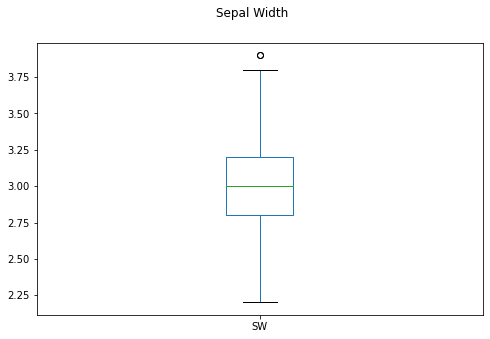

In [23]:
# boxplot after removing the outliers from Sepal Width feature
fig = plt.figure(figsize=(8,5))
iris_data['SW'].plot(kind='box')
fig.suptitle('Sepal Width')
plt.show()

From the above boxplot we can see that we reduced the outliers from the Sepal Width(SW) feature.

In [24]:
# Summary of the data
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              145 non-null    float64
 1   SW              145 non-null    float64
 2   PL              145 non-null    float64
 3   PW              145 non-null    float64
 4   Classification  145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [25]:
# Statistical Summary of the data
iris_data.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.870287,3.025489,3.823017,1.226897
std,0.816690,0.374355,1.709115,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.855944,3.000000,4.300000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


For filling with mean did not introduce observable change in iris dataset

In [26]:
# Label Encode with target 'Classification' feature
from sklearn.preprocessing import LabelEncoder
iris_data['Classification'] = LabelEncoder().fit_transform(iris_data['Classification'])

In [27]:
# check the target variable after label encode
iris_data['Classification'].value_counts()

2    50
1    49
0    46
Name: Classification, dtype: int64

### 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [28]:
# Function to check model performances
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
def check_model_metrices(y_test, y_pred):
    print('Model Accuracy = ', accuracy_score(y_test, y_pred))
    print('Model Precision = ', precision_score(y_test, y_pred, average='micro'))
    print('Model Recall = ', recall_score(y_test, y_pred, average='micro'))
    print('Model F1 Score = ', f1_score(y_test, y_pred, average='micro'))
    print('Confusion Matrix = \n', confusion_matrix(y_test, y_pred))

In [29]:
# Extract feature columns
feature_cols = list(iris_data.columns[:-1])

# Extract target column 'CLassification'
target_col = iris_data.columns[-1] 

# Separate the data into feature data and target data (X and y, respectively),this method is called feature selection
X = iris_data[feature_cols]
y = iris_data[target_col]
print(f'Feature shape: {X.shape}')

Feature shape: (145, 4)


In [30]:
# splitting the data into train and test 
from sklearn.model_selection import train_test_split
# training points (approximately 70%) and testing points (approximately 30%).
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 101 samples.
Testing set has 44 samples.


### Model 1. Multinomial Logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg') # solver - Algorithm to use in the optimization
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


In [32]:
# Calling function to check model performances
check_model_metrices(y_test, lr_pred)

Model Accuracy =  0.8863636363636364
Model Precision =  0.8863636363636364
Model Recall =  0.8863636363636364
Model F1 Score =  0.8863636363636365
Confusion Matrix = 
 [[14  1  0]
 [ 0 10  1]
 [ 0  3 15]]


For good model, accuracy and F1 score should be maximum possible. As per the Multinomial Logistic regression model has performed well with an accuracy of 88.63% with just 5 misclassification.

### Model 2: K-Nearest Neighbors(KNN)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = [] #find the optimum k values
neighbors = np.arange(3,16)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  acc = accuracy_score(y_test,y_pred) # find the maximum accuracy
  acc_values.append(acc)

acc_values

[0.9318181818181818,
 0.9318181818181818,
 0.9318181818181818,
 0.9090909090909091,
 0.9318181818181818,
 0.9318181818181818,
 0.9318181818181818,
 0.9318181818181818,
 0.9318181818181818,
 0.8863636363636364,
 0.9318181818181818,
 0.9090909090909091,
 0.9090909090909091]

Text(0, 0.5, 'accuracy')

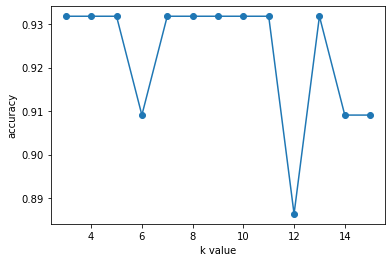

In [34]:
plt.plot(neighbors, acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

As you can see best k value is 3

In [35]:
# now we can make the model with k value as 3
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Calling function to check model performances
check_model_metrices(y_test, y_pred)

Model Accuracy =  0.9318181818181818
Model Precision =  0.9318181818181818
Model Recall =  0.9318181818181818
Model F1 Score =  0.9318181818181818
Confusion Matrix = 
 [[14  1  0]
 [ 0 10  1]
 [ 0  1 17]]


As per the  K-Nearest Neighbors(KNN) model has performed well with an accuracy of 93.18% with 3 misclassification.

Accuracy and F1 Score is much improvement in KNN model

### Model 3: SVM(Support Vector Machine) with multi-class


SVM Kernel have 3 types
1. Linear
2. Polynomial
3. Radial Basis Function (RBF)

In [36]:
# Linear SVM
from sklearn.svm import SVC
# decision_function_shape is set to One-vs_One for multi-class
linear = SVC(kernel='linear', decision_function_shape='ovo') 
linear.fit(X_train, y_train)
linear_pred = linear.predict(X_test)

In [37]:
# Calling function to check model performances
check_model_metrices(y_test, linear_pred)

Model Accuracy =  0.9090909090909091
Model Precision =  0.9090909090909091
Model Recall =  0.9090909090909091
Model F1 Score =  0.9090909090909091
Confusion Matrix = 
 [[15  0  0]
 [ 0 10  1]
 [ 0  3 15]]


As per the SVM(Support Vector Machine) with multi-class using linear kernel model has performed well with an accuracy of 90.90% with 4 misclassification.

Accuracy and F1 Score is much improvement with Logistic Regression and not improved with KNN.

In [38]:
# Polynomial SVM
# decision_function_shape is set to One-vs_One for multi-class
poly = SVC(kernel='poly', degree = 3, decision_function_shape='ovo')
poly.fit(X_train, y_train)
poly_pred = poly.predict(X_test)

In [39]:
# Calling function to check model performances
check_model_metrices(y_test, poly_pred)

Model Accuracy =  0.9318181818181818
Model Precision =  0.9318181818181818
Model Recall =  0.9318181818181818
Model F1 Score =  0.9318181818181818
Confusion Matrix = 
 [[15  0  0]
 [ 0 10  1]
 [ 0  2 16]]


As per the SVM(Support Vector Machine) with multi-class using polinomial kernel model has performed well with an accuracy of 93.18% with 3 misclassification.

Accuracy and F1 Score is much improvement with Logistic Regression and SVM linear kernel also not improved with KNN.

In [40]:
# Radial Basis Function (RBF) SVM
# decision_function_shape is set to One-vs_One for multi-class
rbf = SVC(kernel='rbf', decision_function_shape='ovo') 
rbf.fit(X_train, y_train)
rbf_pred = rbf.predict(X_test)

In [41]:
# Calling function to check model performances
check_model_metrices(y_test, rbf_pred)

Model Accuracy =  0.8636363636363636
Model Precision =  0.8636363636363636
Model Recall =  0.8636363636363636
Model F1 Score =  0.8636363636363636
Confusion Matrix = 
 [[14  1  0]
 [ 0 10  1]
 [ 0  4 14]]


As per the SVM(Support Vector Machine) with multi-class using RBF kernel model has performed well with an accuracy of 86.63% with 6 misclassification.

Accuracy and F1 Score is no improvement with other classification model.

### Model 4: Decision Trees

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [43]:
# Calling function to check model performances
check_model_metrices(y_test, dt_pred)

Model Accuracy =  0.9090909090909091
Model Precision =  0.9090909090909091
Model Recall =  0.9090909090909091
Model F1 Score =  0.9090909090909091
Confusion Matrix = 
 [[15  0  0]
 [ 0 11  0]
 [ 0  4 14]]


As per the Decision Trees model has performed well with an accuracy of 90.90% with 4 misclassification.

Accuracy and F1 Score is no improvement with other classification model.

### Model 5: Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [45]:
# Calling function to check model performances
check_model_metrices(y_test, rf_pred)

Model Accuracy =  0.9318181818181818
Model Precision =  0.9318181818181818
Model Recall =  0.9318181818181818
Model F1 Score =  0.9318181818181818
Confusion Matrix = 
 [[15  0  0]
 [ 0 11  0]
 [ 0  3 15]]


As per the Random Forest model has performed well with an accuracy of 93.18% with 3 misclassification.

Accuracy and F1 Score is no improvement with Polynomial SVM and KNN models.

# Final Verdict

From the analysis, the best performed supervised learning models are:

1. K-Nearest Neighbors(KNN)
2. Polynomial SVM(Support Vector Machine) 
3. Random Forest

These models are performed well with an accuracy of 93.18%